Level 1

a) (For Beginners Only)

Reread the learning material.

Recreate the simple regression example by VanderPlas. Type the code yourself (try to recall it from memory as much as possible, do not copy!).

Look up the modern random functions in the documentation (search for numpy, random, normal, randn, integer or randint, rand) and use them instead.

b) Rewrite the code using PolynomialFeatures, but without using a Pipeline.

c) Experiment with which polynomial degree gives the best result:

Create a loop to iterate through the polynomial degrees.

Plot the results and/or compute the score.

Level 2

Read the section about Gaussian features.

What do Gaussian features have to do with normal distributions? When is it clear how high the "peaks" in the plot are?

What is the similarity to PolynomialFeatures?

Level 3

Try using splines instead of PolynomialFeatures:

Use sklearn.preprocessing.SplineTransformer.

Level 4

a) Recreate the section on regularization by VanderPlas and prepare a short presentation.

b) Recreate the bike example from VanderPlas.

# Simple Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

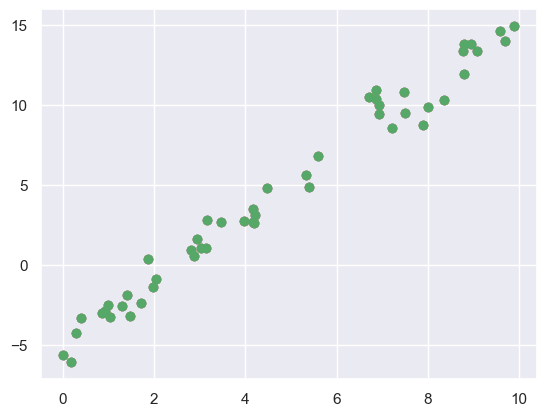

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)
plt.show()

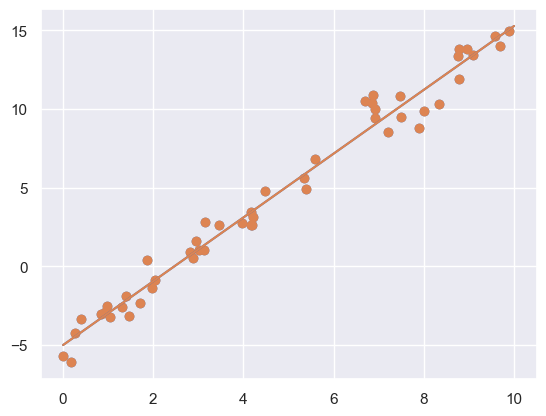

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


# Basic Function Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [9]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

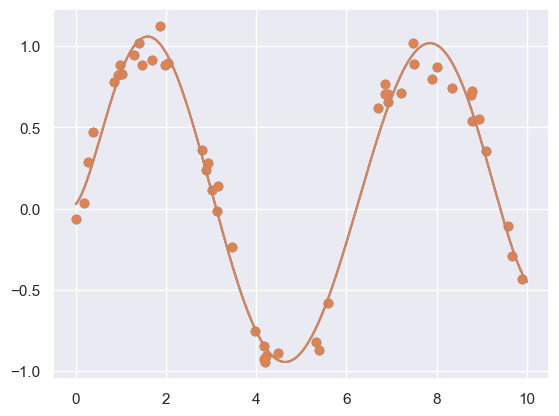

In [11]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## Gaussian basis functions

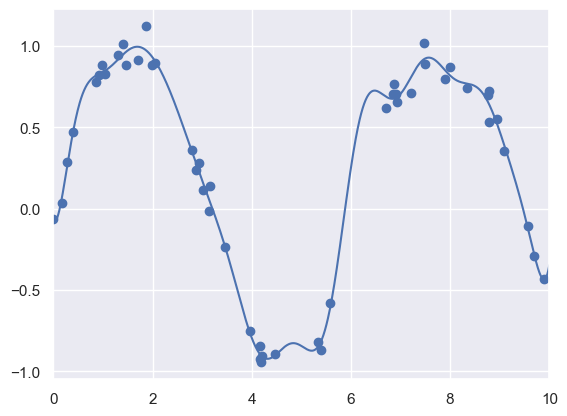

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
plt.show()

# Regularization

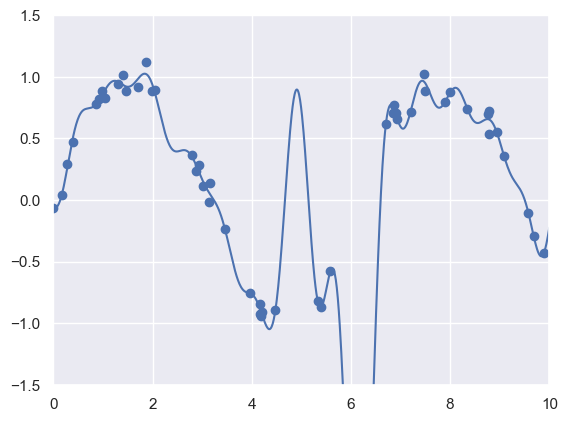

In [13]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.show()

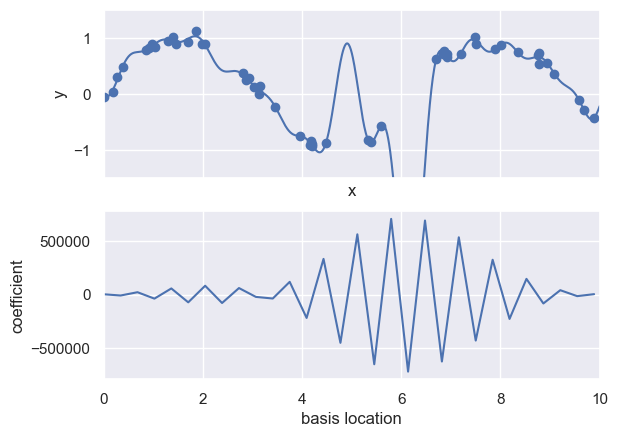

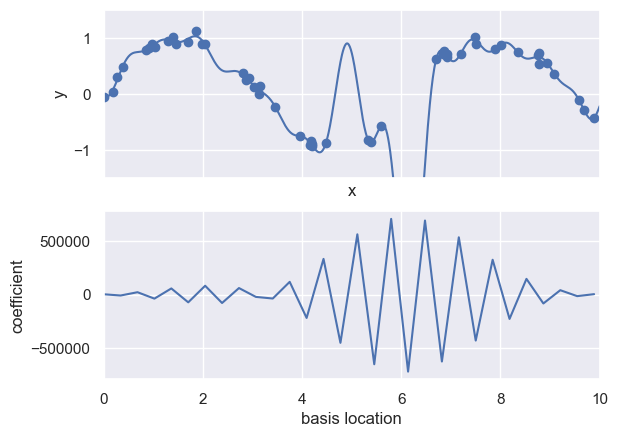

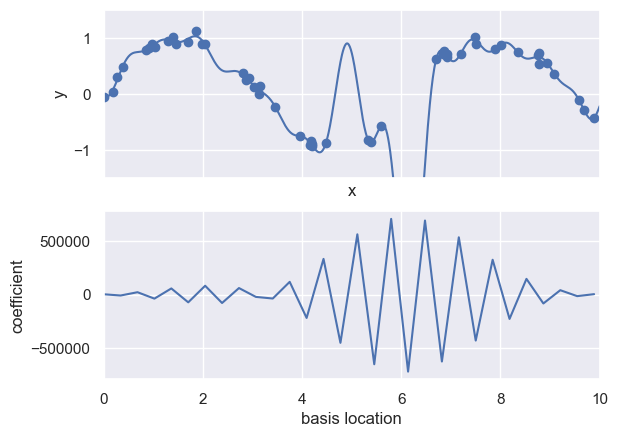

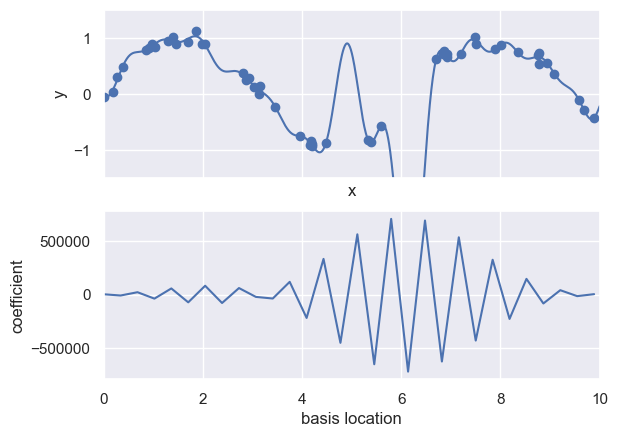

In [17]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    plt.show()
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)


## Ridge regression

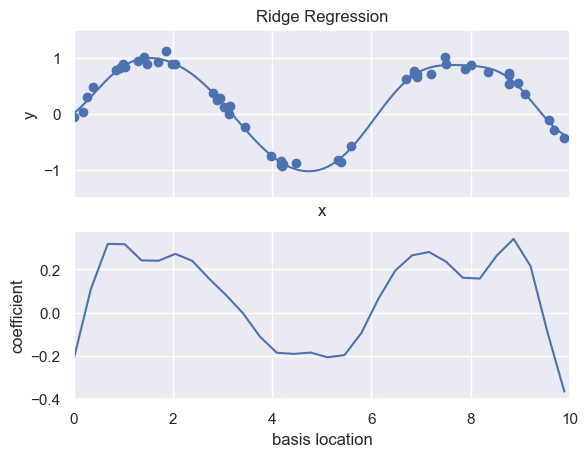

In [18]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

## Lasso regression

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


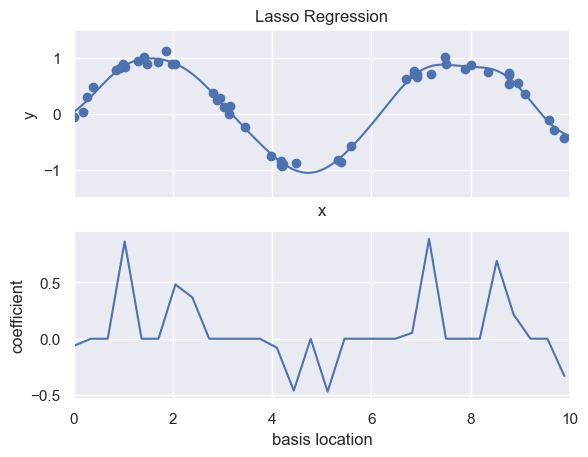

In [19]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

# Task a) Simple regression example

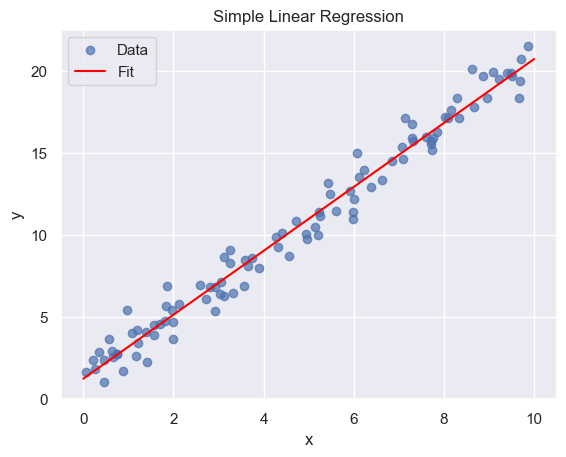

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate random data using modern NumPy functions
np.random.seed(42)
x = np.random.rand(100) * 10  # Random values between 0 and 10
y = 2 * x + 1 + np.random.randn(100)  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(x[:, np.newaxis], y)

# Create predictions
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the results
plt.scatter(x, y, label="Data", alpha=0.7)
plt.plot(xfit, yfit, label="Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()

# Task b) Polynomial Regression Without a Pipeline

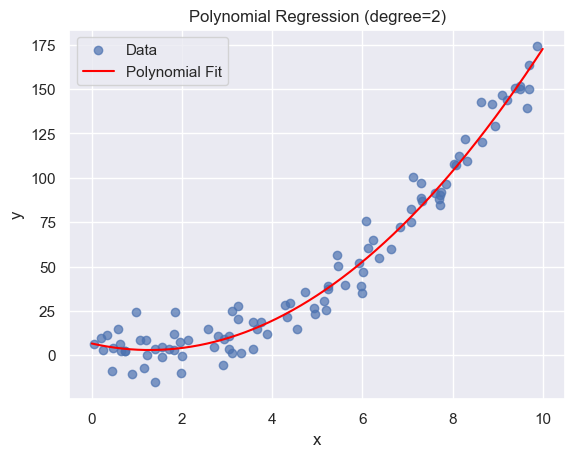

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate data
np.random.seed(42)
x = np.random.rand(100) * 10
y = 2 * x**2 - 3 * x + 1 + np.random.randn(100) * 10

# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x[:, np.newaxis])

# Fit the model
model = LinearRegression()
model.fit(x_poly, y)

# Create predictions
xfit = np.linspace(0, 10, 1000)
xfit_poly = poly.transform(xfit[:, np.newaxis])
yfit = model.predict(xfit_poly)

# Plot the results
plt.scatter(x, y, label="Data", alpha=0.7)
plt.plot(xfit, yfit, label="Polynomial Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression (degree=2)")
plt.show()


# Task c) Experiment with Polynomial Degrees

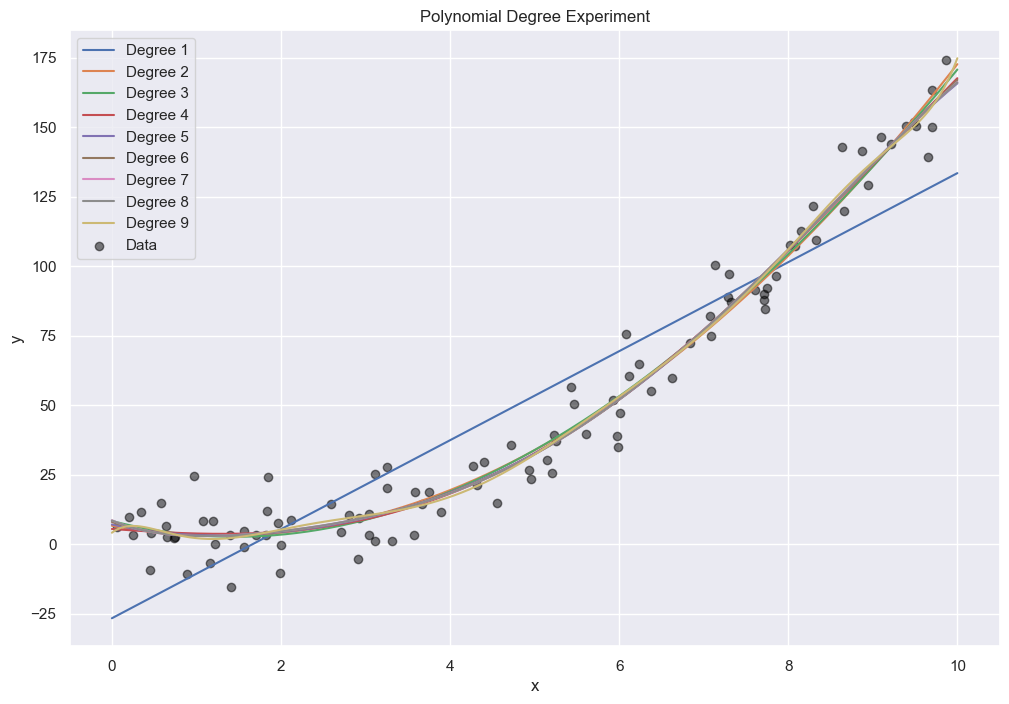

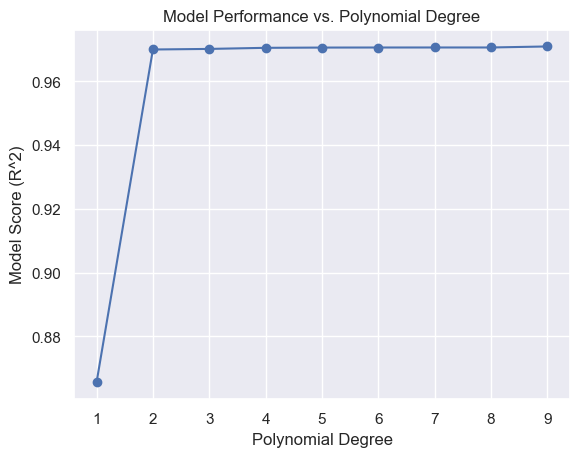

In [22]:
degrees = range(1, 10)  # Polynomial degrees to test
scores = []

plt.figure(figsize=(12, 8))

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(x[:, np.newaxis])
    
    # Fit the model
    model = LinearRegression()
    model.fit(x_poly, y)
    
    # Calculate score
    score = model.score(x_poly, y)
    scores.append(score)
    
    # Plot for each degree
    xfit_poly = poly.transform(xfit[:, np.newaxis])
    yfit = model.predict(xfit_poly)
    plt.plot(xfit, yfit, label=f"Degree {degree}")

# Scatter plot of original data
plt.scatter(x, y, label="Data", alpha=0.5, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Degree Experiment")
plt.show()

# Plot the scores
plt.figure()
plt.plot(degrees, scores, marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Model Score (R^2)")
plt.title("Model Performance vs. Polynomial Degree")
plt.show()


# Level 2: Gaussian Features

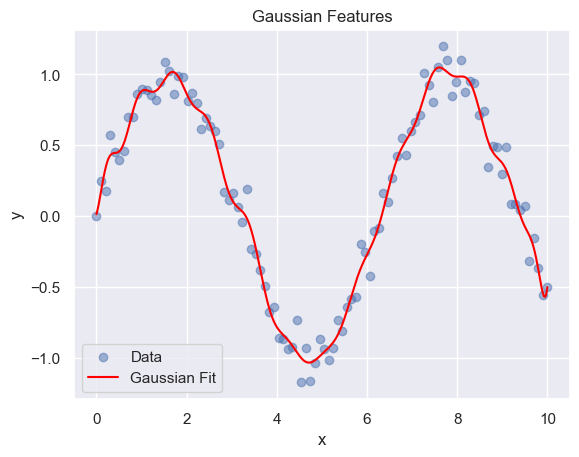

In [23]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression

class GaussianFeatures:
    def __init__(self, n_centers):
        self.n_centers = n_centers
        self.centers_ = None

    def fit(self, X):
        self.centers_ = np.linspace(X.min(), X.max(), self.n_centers)
        return self

    def transform(self, X):
        return np.exp(-0.5 * ((X[:, np.newaxis] - self.centers_) ** 2))

# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Apply Gaussian Features
gf = GaussianFeatures(n_centers=30)
gf.fit(x)
x_gaussian = gf.transform(x)

# Fit linear regression
model = LinearRegression()
model.fit(x_gaussian, y)

# Create predictions
xfit_gaussian = gf.transform(xfit)
yfit = model.predict(xfit_gaussian)

# Plot results
plt.scatter(x, y, label="Data", alpha=0.5)
plt.plot(xfit, yfit, label="Gaussian Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gaussian Features")
plt.show()


# Level 3: Splines

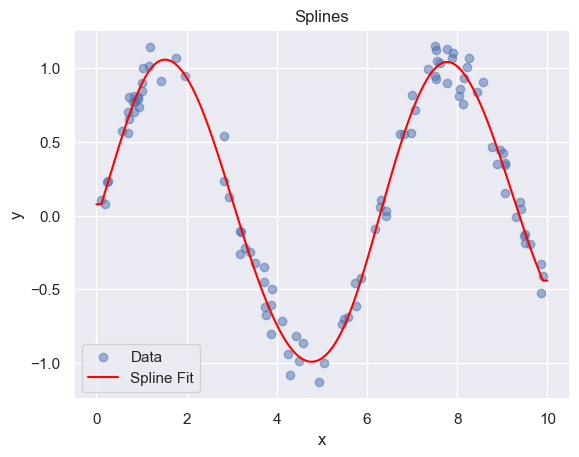

In [24]:
from sklearn.preprocessing import SplineTransformer

# Generate data
x = np.sort(np.random.rand(100) * 10)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Apply spline transformation
spline = SplineTransformer(degree=3, n_knots=10, include_bias=False)
x_spline = spline.fit_transform(x[:, np.newaxis])

# Fit linear regression
model = LinearRegression()
model.fit(x_spline, y)

# Create predictions
xfit_spline = spline.transform(xfit[:, np.newaxis])
yfit = model.predict(xfit_spline)

# Plot results
plt.scatter(x, y, label="Data", alpha=0.5)
plt.plot(xfit, yfit, label="Spline Fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Splines")
plt.show()
